# L4: Describe-and-Generate game 🖍️

UPDATED: Jon Chun, 4 Oct 2024
* Run locally rather than call remote HF API endpoints
* Must store HF_TOKEN in Colab secrets before running

Load your HF API key and relevant Python libraries

In [1]:
from google.colab import userdata
HF_API_KEY = userdata.get('HF_TOKEN')

In [2]:
import os

os.environ["HF_API_KEY"] = HF_API_KEY

In [3]:
import os
import io
from IPython.display import Image, display, HTML
from PIL import Image
import base64

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file
# hf_api_key = os.environ['HF_API_KEY']

In [4]:
!pip install diffusers
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 418.8 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
from diffusers import StableDiffusionPipeline
import torch

In [5]:
# Helper function to load the model and perform inference locally
def get_completion(inputs, model_name, task_type="text-generation", parameters=None):
    # Load the appropriate pipeline based on the task type
    if task_type == "text-generation":
        # Load the text generation pipeline
        model = pipeline(task_type, model=model_name)
        return model(inputs, **(parameters or {}))

    elif task_type == "summarization":
        # Load summarization model and pipeline
        model = pipeline(task_type, model=model_name)
        return model(inputs, **(parameters or {}))

    elif task_type == "image-caption":
        # Load summarization model and pipeline
        model = pipeline(task_type, model=model_name)
        return model(inputs, **(parameters or {}))

    elif task_type == "image-generation":
        # Use a local Stable Diffusion model for image generation
        device = "cuda" if torch.cuda.is_available() else "cpu"
        pipe = StableDiffusionPipeline.from_pretrained(model_name).to(device)
        return pipe(inputs, **(parameters or {})).images[0]  # Returns the generated image

    else:
        raise ValueError(f"Task type '{task_type}' is not supported.")

# Example usage for text generation
model_name = "gpt2"  # You can replace this with any model (e.g., "facebook/bart-large-cnn" for summarization)
prompt = "Once upon a time"
output = get_completion(prompt, model_name=model_name, task_type="text-generation")

# Print or display the output (for text-generation tasks)
print(output)

# Example usage for image generation
image_prompt = "A futuristic city skyline at sunset"
output_image = get_completion(image_prompt, model_name="stabilityai/stable-diffusion-2-1-base", task_type="image-generation")

# Display the generated image (for image-generation tasks)
output_image.show()


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time in the galaxy, when the whole galaxy became a giant ice cave;\n\nwhat the Gods have in store for us must be revealed.\n\nThe next day, when we get past the barrier, we see that they are'}]


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Example usage for image-caption
model_name = "gpt2"  # You can replace this with any model (e.g., "facebook/bart-large-cnn" for summarization)
prompt = "Once upon a time"
output = get_completion(prompt, model_name=model_name, task_type="text-generation")

# Print or display the output (for text-generation tasks)
print(output)

# Example usage for image generation
image_prompt = "A futuristic city skyline at sunset"
output_image = get_completion(image_prompt, model_name="stabilityai/stable-diffusion-2-1-base", task_type="image-generation")

In [6]:
# Example usage for text generation
model_name = "gpt2"  # You can replace this with any model (e.g., "facebook/bart-large-cnn" for summarization)
prompt = "Once upon a time"
output = get_completion(prompt, model_name=model_name, task_type="text-generation")

# Print or display the output (for text-generation tasks)
print(output)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, the first thing the "brave" man would have had to do was to give them instructions. When all was done, however, he asked: "Don\'t you do what I ask you to do?"\n\n"'}]


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

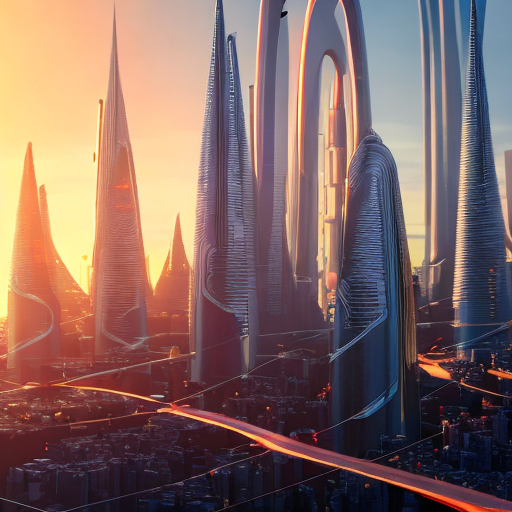

In [8]:
from IPython.display import display

# Example usage for image generation
image_prompt = "A futuristic city skyline at sunset"
output_image = get_completion(image_prompt, model_name="stabilityai/stable-diffusion-2-1-base", task_type="image-generation")

# Display the generated image in Colab
display(output_image)


## Building your game with `gr.Blocks()`

In [ ]:
#Bringing the functions from lessons 3 and 4!
def image_to_base64_str(pil_image):
    byte_arr = io.BytesIO()
    pil_image.save(byte_arr, format='PNG')
    byte_arr = byte_arr.getvalue()
    return str(base64.b64encode(byte_arr).decode('utf-8'))

def base64_to_pil(img_base64):
    base64_decoded = base64.b64decode(img_base64)
    byte_stream = io.BytesIO(base64_decoded)
    pil_image = Image.open(byte_stream)
    return pil_image

def captioner(image):
    base64_image = image_to_base64_str(image)
    result = get_completion(base64_image, None, ITT_ENDPOINT)
    return result[0]['generated_text']

def generate(prompt):
    output = get_completion(prompt, None, "image-generation")
    result_image = base64_to_pil(output)
    return result_image

### First attempt, just captioning

In [ ]:
import gradio as gr
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")

    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT1']))

### Let's add generation

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_caption = gr.Button("Generate caption")
    caption = gr.Textbox(label="Generated caption")
    btn_image = gr.Button("Generate image")
    image_output = gr.Image(label="Generated Image")
    btn_caption.click(fn=captioner, inputs=[image_upload], outputs=[caption])
    btn_image.click(fn=generate, inputs=[caption], outputs=[image_output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT2']))

### Doing it all at once

In [ ]:
def caption_and_generate(image):
    caption = captioner(image)
    image = generate(caption)
    return [caption, image]

with gr.Blocks() as demo:
    gr.Markdown("# Describe-and-Generate game 🖍️")
    image_upload = gr.Image(label="Your first image",type="pil")
    btn_all = gr.Button("Caption and generate")
    caption = gr.Textbox(label="Generated caption")
    image_output = gr.Image(label="Generated Image")

    btn_all.click(fn=caption_and_generate, inputs=[image_upload], outputs=[caption, image_output])

gr.close_all()
demo.launch(share=True, server_port=int(os.environ['PORT3']))

In [ ]:
gr.close_all()